In [ ]:
library("IRdisplay")
display_html("
<style>
body {background-color : grey;
      color: black;
      font-family: Calibri;
      font-size: 200%
}

h1  {color: darkblue;
     font-family: Calibri;
     font-size: 400%;
}

h2  {color: red;
     font-family: Calibri; 
     font-size: 350%;
}

h3  {color: black;
}

p   {font-size: 200%;
     font-family: Calibri;
     padding: 10px 0px 10px;
     line-height: 30px;
}

li {font-size: 200%;
    font-family: Calibri;
    padding: 10px 0px;
    line-height: 30px;
}
strong {font-size: 200%;
        font-weight: bold;    
}
.row {
    display: flex;
}
.column{
    flex:50%;
}
</style>
")

<h1 style = "font-size:400%">Network Analysis Example</h1><br>

<p><span style = "font-family: Courier New">iGraph</span> provides some rudimentary algorithms to analyse networks.</p>
<p>Let's load a more interesting network before we try them out.</p>
<p>Have a look at the data file <b>got_network_all.csv</b> to see how it's structured (it should be in the same Canvas location where you obtained this R Jupyter notebook)</p>

In [1]:
# First check that igraph is installed and loaded
if (!"igraph" %in% installed.packages()) install.packages("igraph")
# this 'library' function loads the package in quotation marks
library("igraph")

# import in the .csv file with the Game of Thrones network data
dataGoT = read.csv("got_network_all.csv", header=TRUE, check.names=FALSE)

#now create an edge list using the first two columns from this data
edgelist = as.matrix(dataGoT[,1:2])

#Generate an iGraph object from this edgelist
Graph_GoT = graph.edgelist(edgelist, directed = FALSE)

# how many edges and nodes are there in this graph?
paste0("Graph_GoT has ",gorder(Graph_GoT)," nodes") 
paste0("Graph_GoT has ",gsize(Graph_GoT)," edges") 

Warning message:
"package 'igraph' was built under R version 4.1.2"

Attaching package: 'igraph'


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union




[1] "Graph_GoT has 796 nodes"

[1] "Graph_GoT has 3909 edges"

<p>The data set we have just imported contains an edgelist of all characters (represented as nodes by their character names) and edges (connections to other characters they have interacted with) for each of the five books in the A Song of Ice and Fire series, which is the basis for the Game of Thrones TV series.</p>
<p>The source of the files that were used to make this dataset can be found here: <a href="https://github.com/himanshubeniwal/A-Network-analysis-of-Game-of-Thrones/tree/master/datasets">Link to Game of Thrones network dataset</a></p>
<p>There are 5 columns in this data set:</p>
<p><b>Source &nbsp;&nbsp;&nbsp;&nbsp; Target &nbsp;&nbsp;&nbsp;&nbsp; Type &nbsp;&nbsp;&nbsp;&nbsp; weight &nbsp;&nbsp;&nbsp;&nbsp; book</b></p>
<ul>
    <li><b>Source:</b> one of the connected nodes</li>
    <li><b>Target:</b> the other end of the edge connecting the 2 nodes</li>
    <li><b>Type:</b> type of edge connection [NOTE: all are undirected edge connections here]</li>
    <li><b>weight:</b> the number of times the two characters represented by the Source and Target nodes interact in each book</li>
    <li><b>book:</b> the book number in the series in which the interaction(s) tookplace</li>
    </ul>

<p>For example, row 1542 of the file reads as:</p>
<p><b>Daenerys-Targaryen &nbsp;&nbsp;&nbsp;&nbsp; Jorah-Mormont &nbsp;&nbsp;&nbsp;&nbsp; Undirected &nbsp;&nbsp;&nbsp;&nbsp; 75 &nbsp;&nbsp;&nbsp;&nbsp; 1</b></p>
<p>This can be read as Daenerys Targaryen and Jorah Mormont interacted 75 times in total in Book 1 of the series of five books.</p>

<p> Let's plot the whole network of the Game of Thrones characters: (this might be messy!)</p>
<p>Let's resize the area that the network plot is shown in, as the network is quite large, with 796 nodes, and 3909 edges:</p>

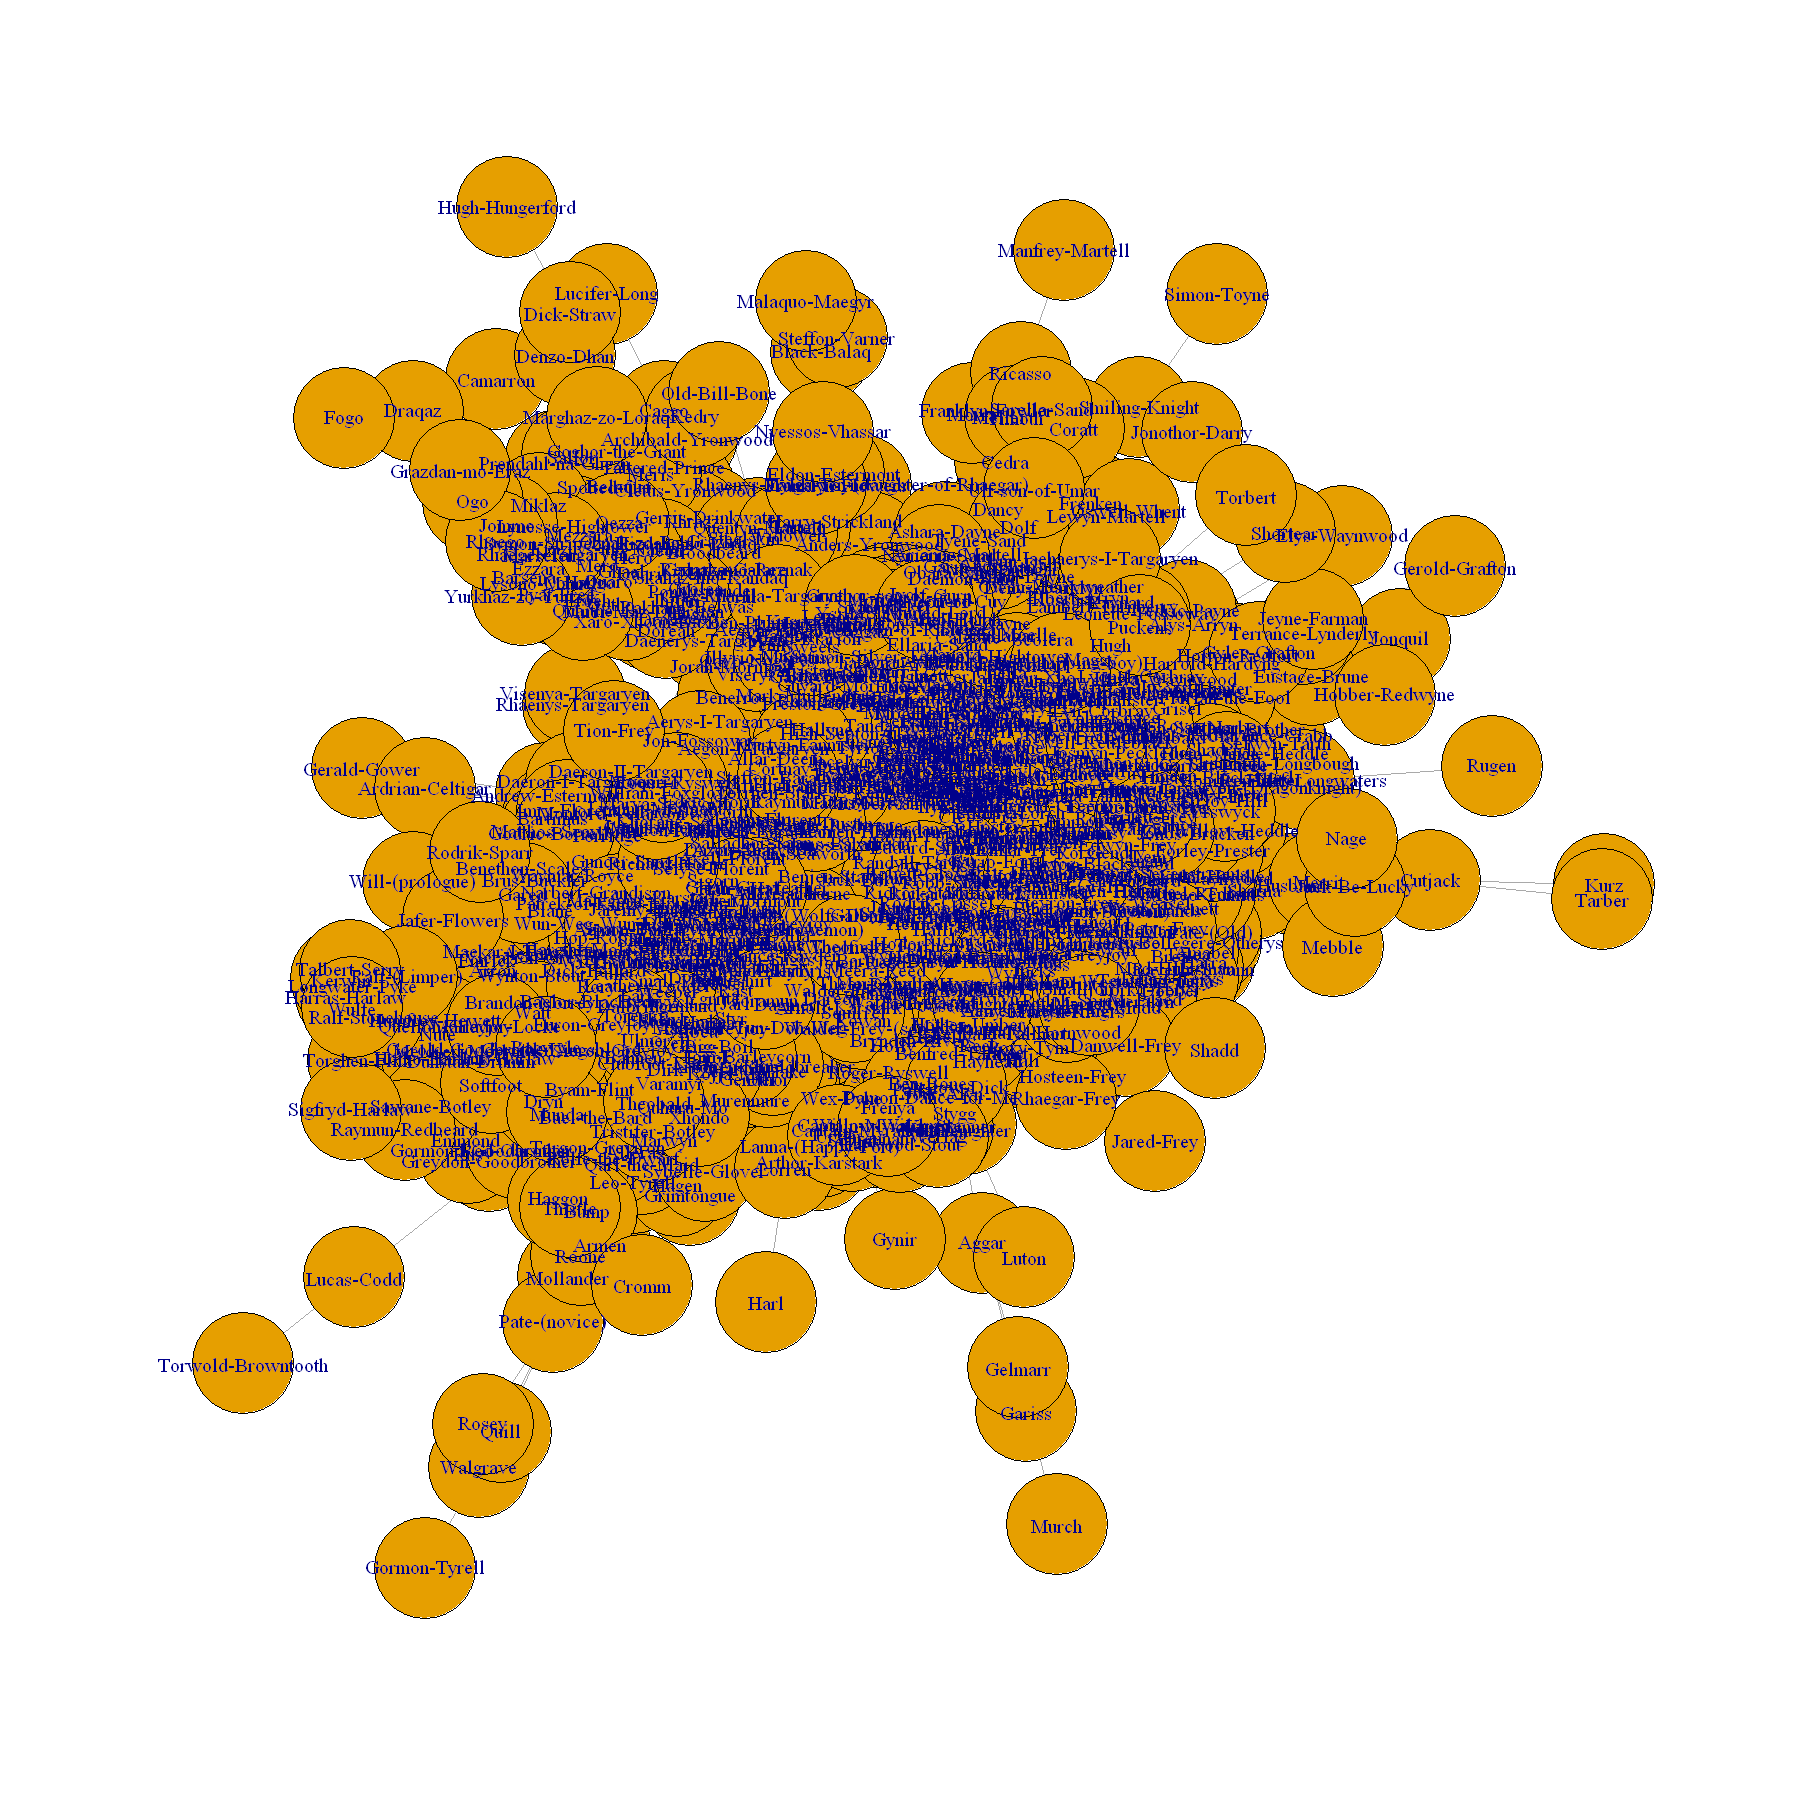

In [2]:
options(repr.plot.width=15, repr.plot.height=15) # this resizes the plot area (default = 7 by 7)
plot(Graph_GoT)

<strong> It is quite complex and this plot doesn't tell us much other than it is a large network!</strong>

In [3]:
dataGoT

Source,Target,Type,weight,book
<chr>,<chr>,<chr>,<int>,<int>
Addam-Marbrand,Brynden-Tully,undirected,3,4
Addam-Marbrand,Cersei-Lannister,undirected,3,4
Addam-Marbrand,Gyles-Rosby,Undirected,3,3
Addam-Marbrand,Jaime-Lannister,Undirected,3,1
Addam-Marbrand,Jaime-Lannister,Undirected,3,3
Addam-Marbrand,Jaime-Lannister,undirected,8,4
Addam-Marbrand,Jalabhar-Xho,Undirected,3,3
Addam-Marbrand,Joffrey-Baratheon,Undirected,3,3
Addam-Marbrand,Kevan-Lannister,Undirected,3,3


<h1 style = "font-size:400%">Using Attributes to Filter a Network</h1>
<p>The plot of the full dataset does not tell us much, other than the fact that we need to either alter the plot aesthetics (the sizes, colours and opacities of the edges and nodes), or we need to reduce the dataset sixe using some appropriate filtering mechanism.</p>
<p>We could separate the data by book number, as that is one of the attributes of the edges in the original data file.</p>
<p>But first, we need to add the two "book" and "weight" attributes we were  provided in the original data file, and embed them back into the network object <span style = "font-family: Courier New">Graph_GoT</span>:</p>

In [4]:
Graph_GoT <- Graph_GoT %>% 
        set_edge_attr("weight", value = dataGoT[,4]) %>% # sets the weight of each edge as per the intial dataset
        set_edge_attr("book", value = dataGoT[,5])
# E(Graph_GoT)[[]] # uncomment this code to check that the attributes are correct - it will return a lengthy list but scroll down to check that the weight and book attributes have been added correctly

<p>Now we can create new, smaller subnetworks by filtering by each book attribute's number/value:</p>

In [5]:
# the subset function works like (object to be subsetted, logical expression to carry out the subset)
book1_data <- subset(dataGoT, dataGoT$book == 1)
# create the basic Book 1 graph with nodes and edges only
GoT_Book1 <- graph.edgelist(as.matrix(book1_data[,1:2]), directed = FALSE)
#adds the book and weight attrbiutes from book1_data
GoT_Book1 <- GoT_Book1 %>% set_edge_attr("weight", value = book1_data[,4]) %>% set_edge_attr("book", value = book1_data[,5])

paste0("Book 1 graph has ",gorder(GoT_Book1)," nodes, and ",gsize(GoT_Book1)," edges.") 

# book 2
book2_data <- subset(dataGoT,dataGoT$book == 2)
GoT_Book2 = graph.edgelist(as.matrix(book2_data[,1:2]), directed = FALSE)
GoT_Book2 <- GoT_Book2 %>% set_edge_attr("weight", value = book2_data[,4]) %>% set_edge_attr("book", value = book2_data[,5])

# book 3
book3_data <- subset(dataGoT,dataGoT$book == 3)
GoT_Book3 = graph.edgelist(as.matrix(book3_data[,1:2]), directed = FALSE)
GoT_Book3 <- GoT_Book3 %>% set_edge_attr("weight", value = book3_data[,4]) %>% set_edge_attr("book", value = book3_data[,5])

# book 4
book4_data <- subset(dataGoT,dataGoT$book == 4)
GoT_Book4 = graph.edgelist(as.matrix(book4_data[,1:2]), directed = FALSE)
GoT_Book4 <- GoT_Book4 %>% set_edge_attr("weight", value = book4_data[,4]) %>% set_edge_attr("book", value = book4_data[,5])

# book 5
book5_data <- subset(dataGoT,dataGoT$book == 5)
GoT_Book5 = graph.edgelist(as.matrix(book5_data[,1:2]), directed = FALSE)
GoT_Book5 <- GoT_Book5 %>% set_edge_attr("weight", value = book5_data[,4]) %>% set_edge_attr("book", value = book5_data[,5])

paste0("Book 2 graph has ",gorder(GoT_Book2)," nodes, and ",gsize(GoT_Book2)," edges.") 
paste0("Book 3 graph has ",gorder(GoT_Book3)," nodes, and ",gsize(GoT_Book3)," edges.") 
paste0("Book 4 graph has ",gorder(GoT_Book4)," nodes, and ",gsize(GoT_Book4)," edges.") 
paste0("Book 5 graph has ",gorder(GoT_Book1)," nodes, and ",gsize(GoT_Book5)," edges.")

[1] "Book 1 graph has 187 nodes, and 684 edges."

[1] "Book 2 graph has 259 nodes, and 775 edges."

[1] "Book 3 graph has 303 nodes, and 1008 edges."

[1] "Book 4 graph has 274 nodes, and 682 edges."

[1] "Book 5 graph has 187 nodes, and 760 edges."

<strong> Now we can plot the data for book 1 only.</strong><br>

<p>This should be more manageable and so hopefully we will be able to see more detail from the visualization:</p>

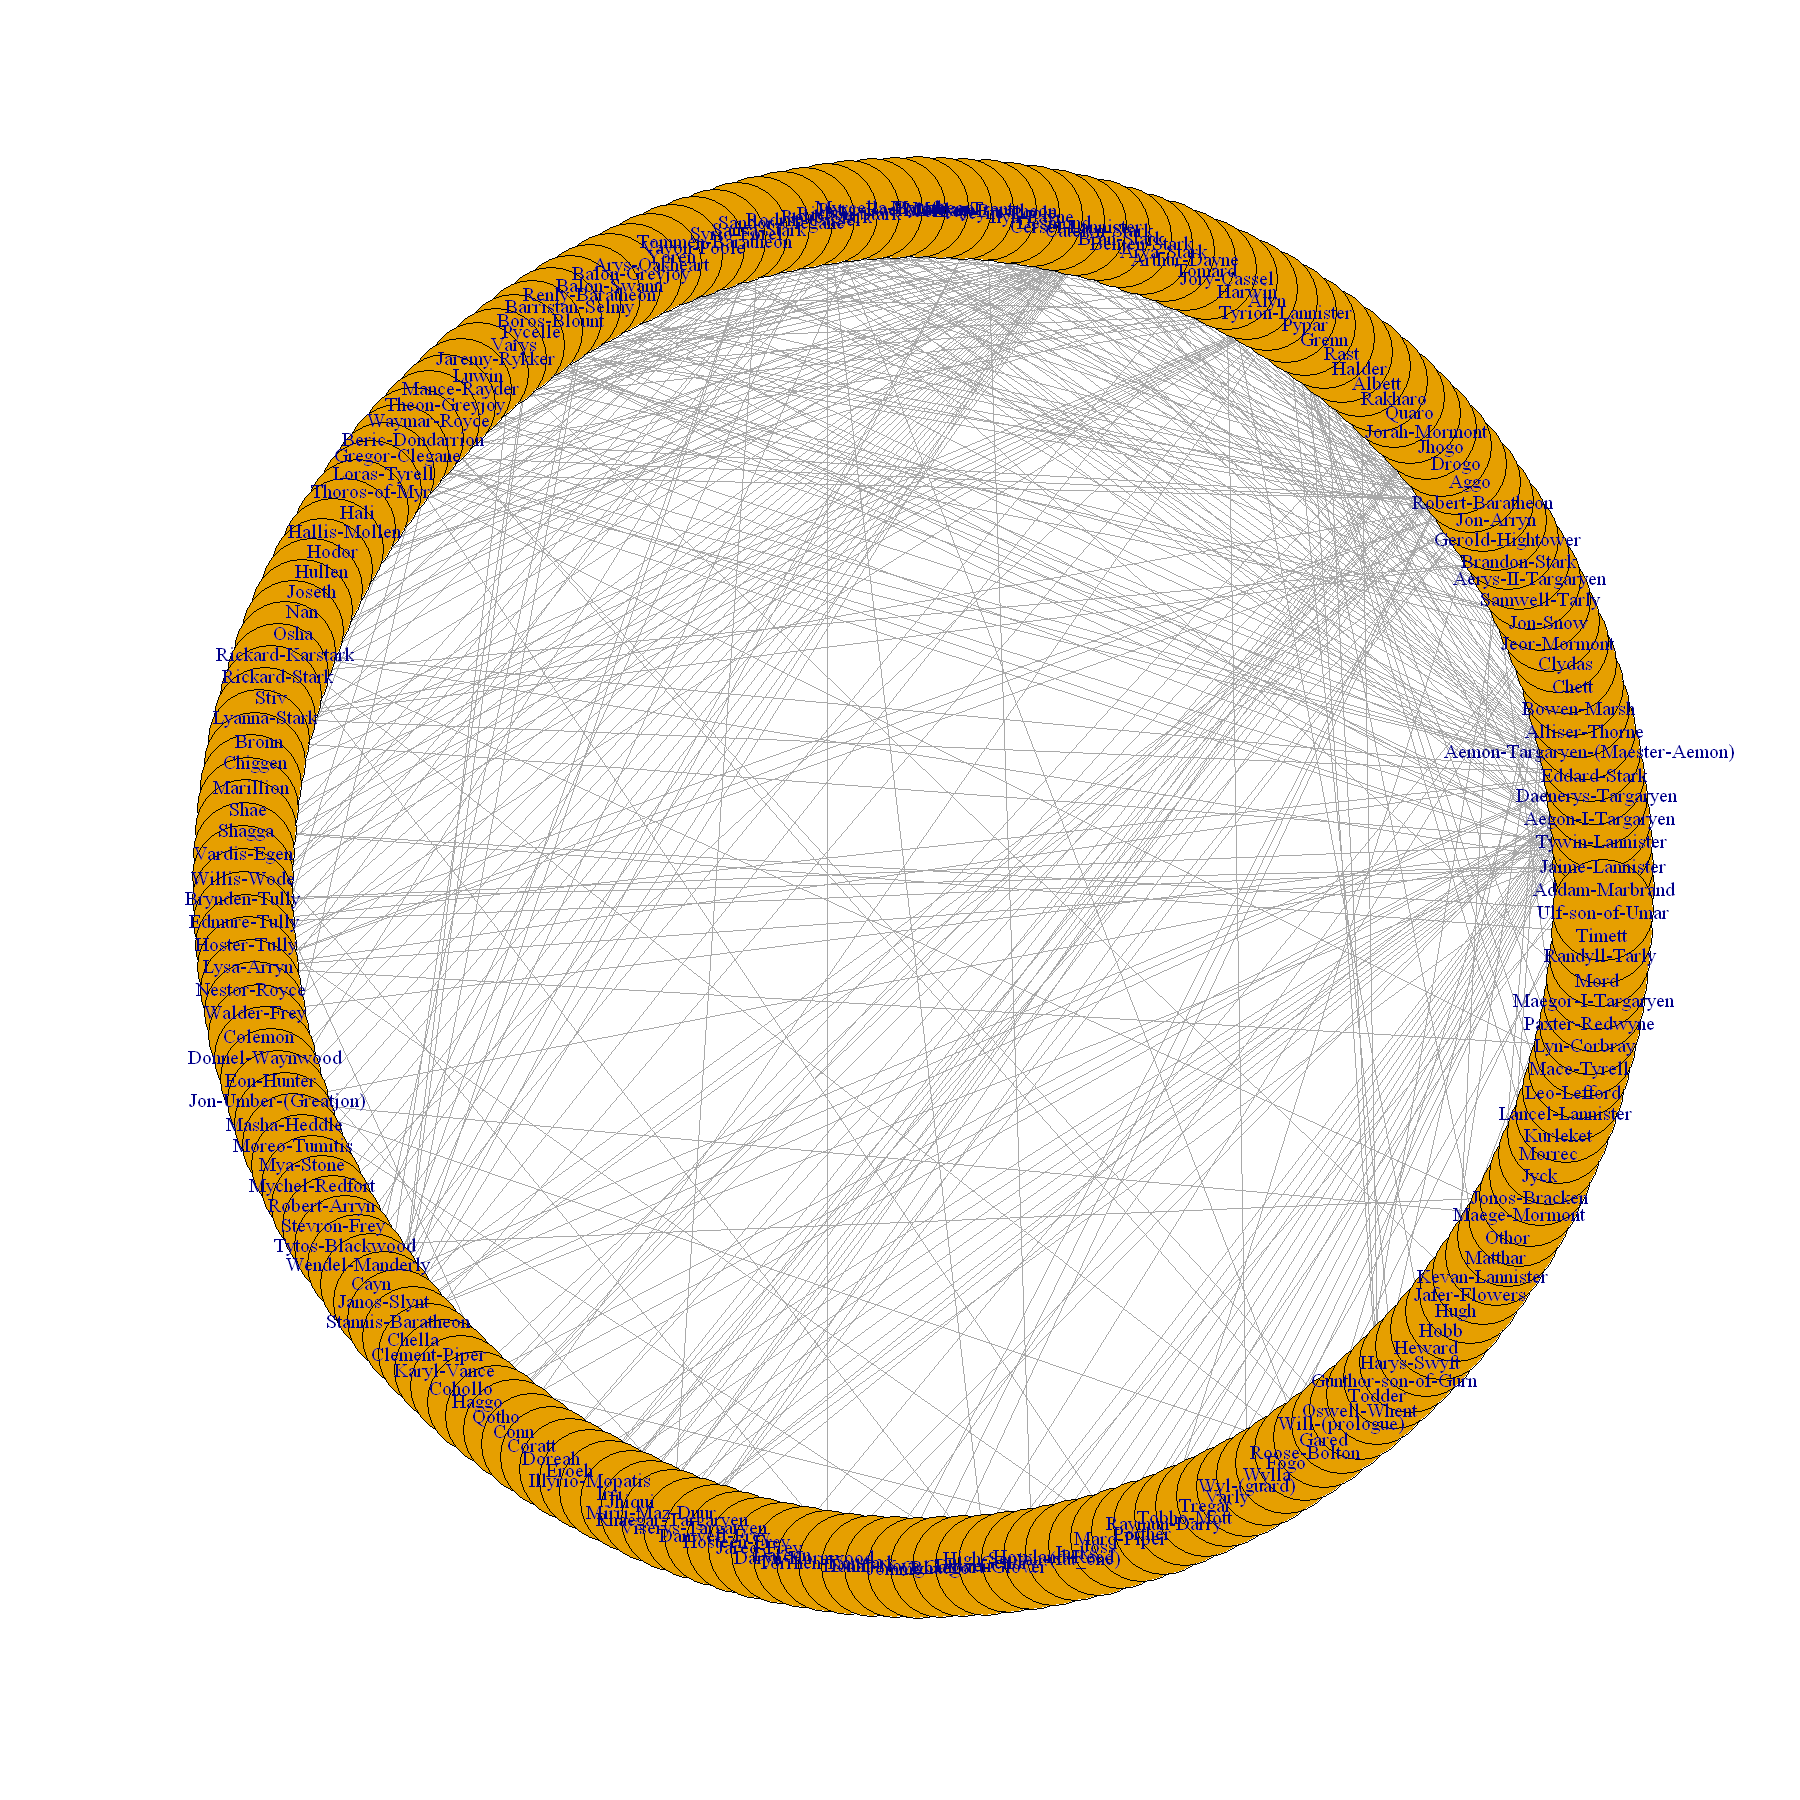

In [6]:
options(repr.plot.width=15, repr.plot.height=15) # this resizes the plot area (default = 7 by 7)
plot(GoT_Book1, layout = layout.circle)

<p>Hmmm, the circle layout doesn't really help here, as there are 187 nodes to display, along with the 687 edges.</p>
<p>Let's try a different layout, this time one that is known as a force-directed layout which uses the Fruchterman-Reingold algorithm to create the layout. The layout tries to generate a nicer looking plot and with edges which are the same or similar lengths and intersect minimally: </p>

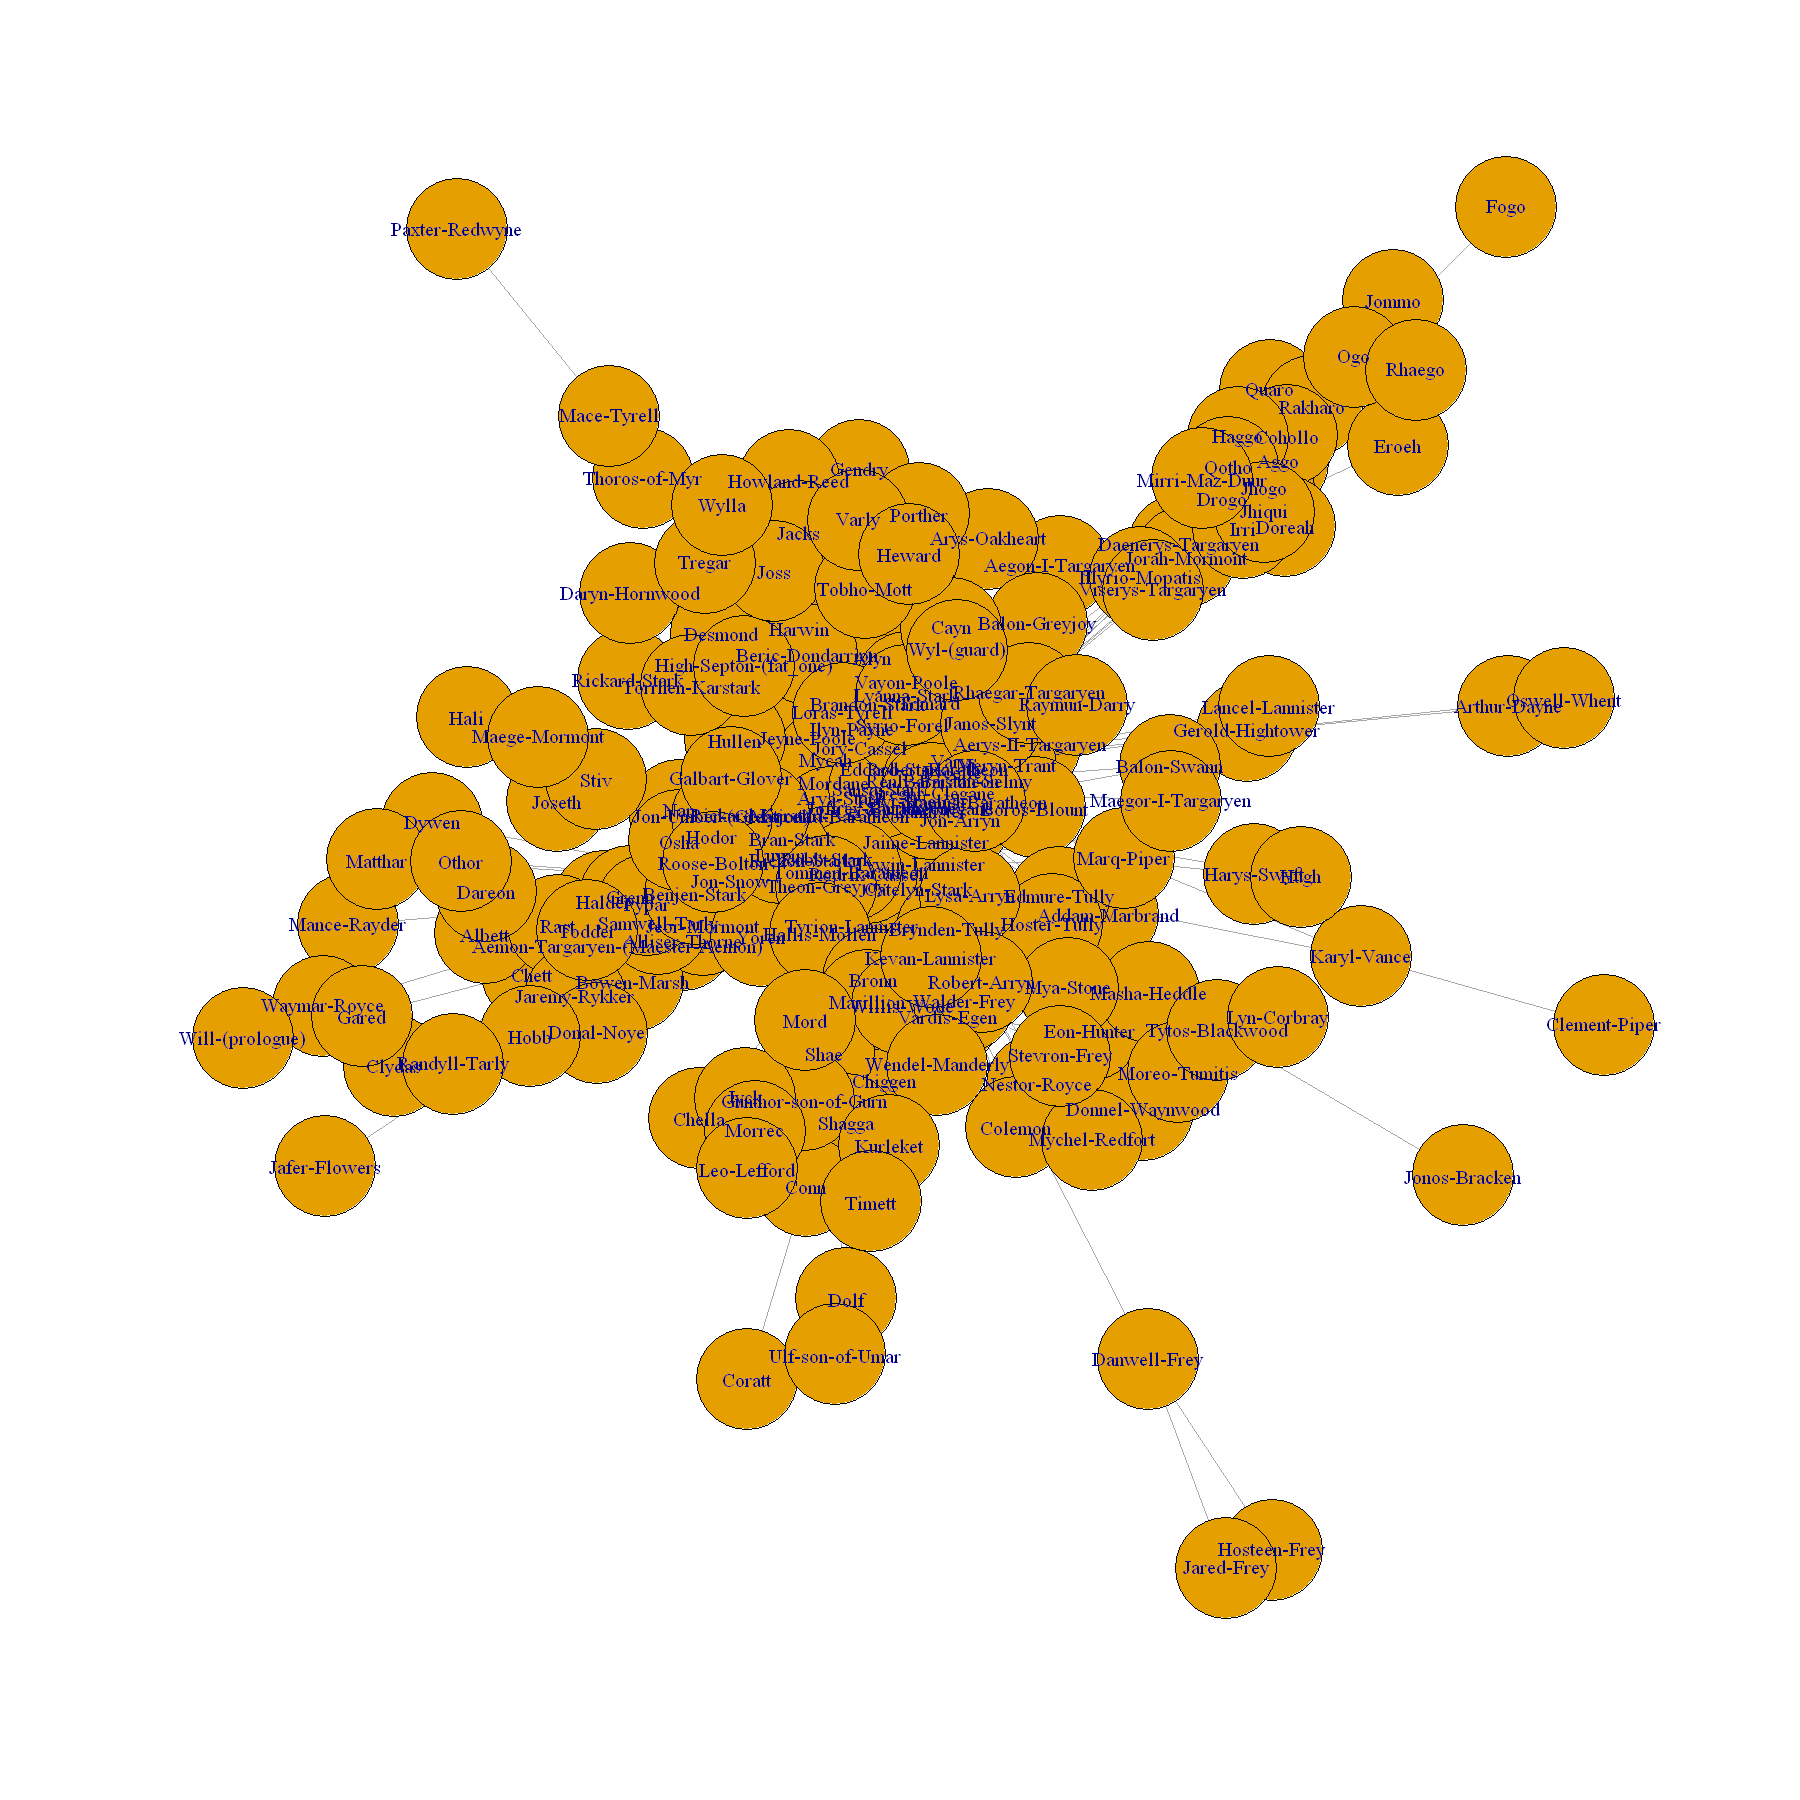

In [7]:
fr_layout <- layout_with_fr(GoT_Book1) # this creates the force-directed layout information for our Book 1 data
plot(GoT_Book1, layout = fr_layout)

<p>This still isn't a great layout, so we could try something else.</p>
<p>Can we provide for ourselves a set of different layouts and see which one looks best for the data?</p>

<h1 style = "font-size:400%">Comparing Network Plot Layouts</h1><br>
<p>This section provides some examples of how to look at multiple layouts for your graph object, allowing you to visually see and select ones which may be more usual in understanding the network structure.</p>
<p>This next code cell does just that for us, although it will take a bit of time to execute so be patient with this cell.</p>
<p>A full list of the built-in layouts available with the iGraph package can be found online and are listed with the names and links to their respective documentation:</p>
<ul>
    <li><a href = "https://igraph.org/r/doc/layout_as_bipartite.html"><span style = "font-family: Courier New">layout_as_bipartite</span></a></li>
        <li><a href = "https://igraph.org/r/doc/merge_coords.html"><span style = "font-family: Courier New">layout_as_components</span></a></li>
        <li><a href = "https://igraph.org/r/doc/layout_as_star.html"><span style = "font-family: Courier New">layout_as_star</span></a></li>
        <li><a href = "https://igraph.org/r/doc/layout_as_tree.html"><span style = "font-family: Courier New">layout_as_tree</span></a></li>
        <li><a href = "https://igraph.org/r/doc/layout_in_circle.html"><span style = "font-family: Courier New">layout_in_circle</span></a></li>
        <li><a href = "https://igraph.org/r/doc/layout_nicely.html"><span style = "font-family: Courier New">layout_nicely</span></a></li>
        <li><a href = "https://igraph.org/r/doc/layout_on_grid.html"><span style = "font-family: Courier New">layout_on_grid</span></a></li>
        <li><a href = "https://igraph.org/r/doc/layout_on_sphere.html"><span style = "font-family: Courier New">layout_on_sphere</span></a></li>
        <li><a href = "https://igraph.org/r/doc/layout_randomly.html"><span style = "font-family: Courier New">layout_randomly</span></a></li>
        <li><a href = "https://igraph.org/r/doc/layout_with_dh.html"><span style = "font-family: Courier New">layout_with_dh</span></a></li>
        <li><a href = "https://igraph.org/r/doc/layout_with_fr.html"><span style = "font-family: Courier New">layout_with_fr</span></a></li>
        <li><a href = "https://igraph.org/r/doc/layout_with_gem.html"><span style = "font-family: Courier New">layout_with_gem</span></a></li>
        <li><a href = "https://igraph.org/r/doc/layout_with_graphopt.html"><span style = "font-family: Courier New">layout_with_graphopt</span></a></li>
        <li><a href = "https://igraph.org/r/doc/layout_with_kk.html"><span style = "font-family: Courier New">layout_with_kk</span></a></li>
        <li><a href = "https://igraph.org/r/doc/layout_with_lgl.html"><span style = "font-family: Courier New">layout_with_lgl</span></a></li>
        <li><a href = "https://igraph.org/r/doc/layout_with_mds.html"><span style = "font-family: Courier New">layout_with_mds</span></a></li>
        <li><a href = "https://igraph.org/r/doc/layout_with_sugiyama.html"><span style = "font-family: Courier New">layout_with_sugiyama</span></a></li>
</ul>
<p>These 17 plot layouts can be shown side by side for comparsion purposes, which may allow you to select one that is more useful, or at least deselect some that are not appropriate.</p>
<p>This code snippet below generates plots of all except for a bipartite graph, which is highly unlikely to be appropriate for character interactions in a novel.</p>
<p> Note that generating these plots may take some time, so be patient with the code execution:</p>

[1] "layout_as_star"
[1] "layout_as_tree"
[1] "layout_components"
[1] "layout_in_circle"
[1] "layout_nicely"
[1] "layout_on_grid"
[1] "layout_on_sphere"
[1] "layout_randomly"
[1] "layout_with_dh"
[1] "layout_with_drl"
[1] "layout_with_fr"
[1] "layout_with_gem"
[1] "layout_with_graphopt"
[1] "layout_with_kk"
[1] "layout_with_lgl"
[1] "layout_with_mds"


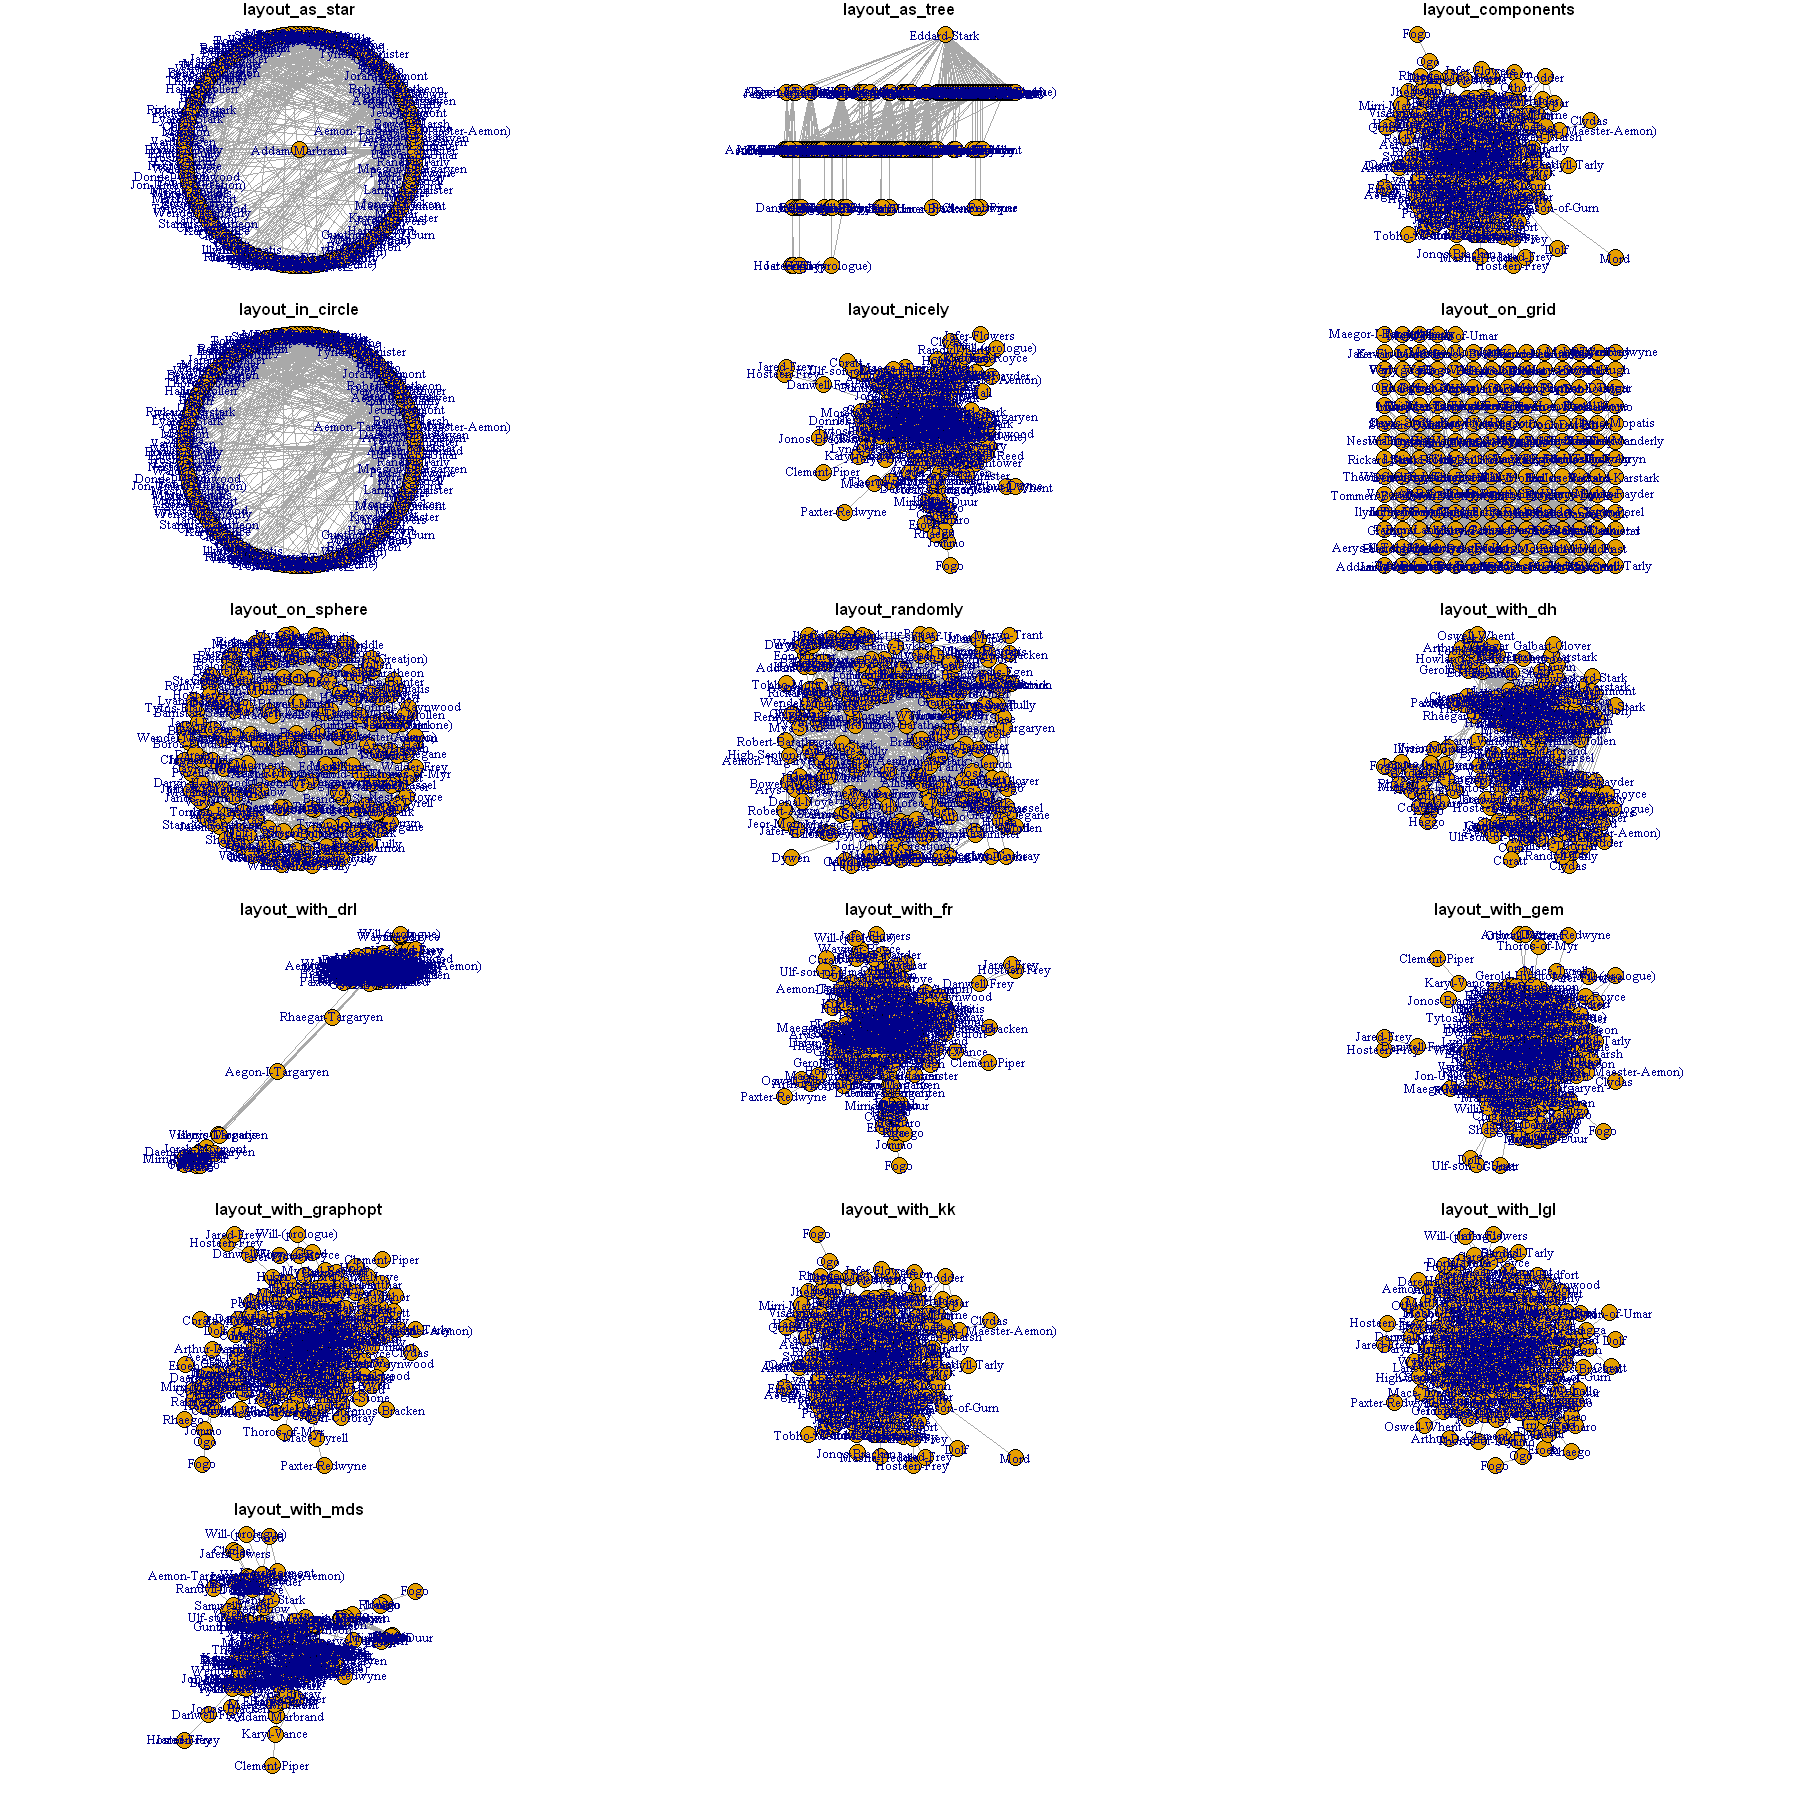

In [8]:
# this code obtains all layouts that are available specifically from iGraph package
layouts <- grep("^layout_", ls("package:igraph"), value=TRUE)[-1] 

# Remove layouts that are not appropriate here:
layouts <- layouts[!grepl("bipartite|sugiyama", layouts)]

# this code snippet creates a plotting frame that presents layouts in a row of 3, with some margin space betwen each one
par(mfrow=c(6,3), mar=c(1,1,1,1))

for (layout in layouts) {

  print(layout) # uncomment this if you want to see the layout names more clearly
  l <- do.call(layout, list(GoT_Book1)) 
  plot(GoT_Book1, edge.arrow.mode=0, layout=l, main=layout)
}

<h1 style = "font-size:400%">Further Refinement of Network Plots</h1><br>
<p>It is still quite difficult to decide which network layout is useful from these selections.</p>
<p>So let's do 2 things to improve the visualisation:
    <ol>
        <li><b>Remove some of the less helpful layout options</b></li>
        <li><b>Only show connections which are greater than the average weight</b></li>
    </ol>
 <p> These steps should reduce the number of edges and nodes being plotted, leaving only the nodes and edges which have above average weight, while removing some of the obviously not helpful layouts:</p>

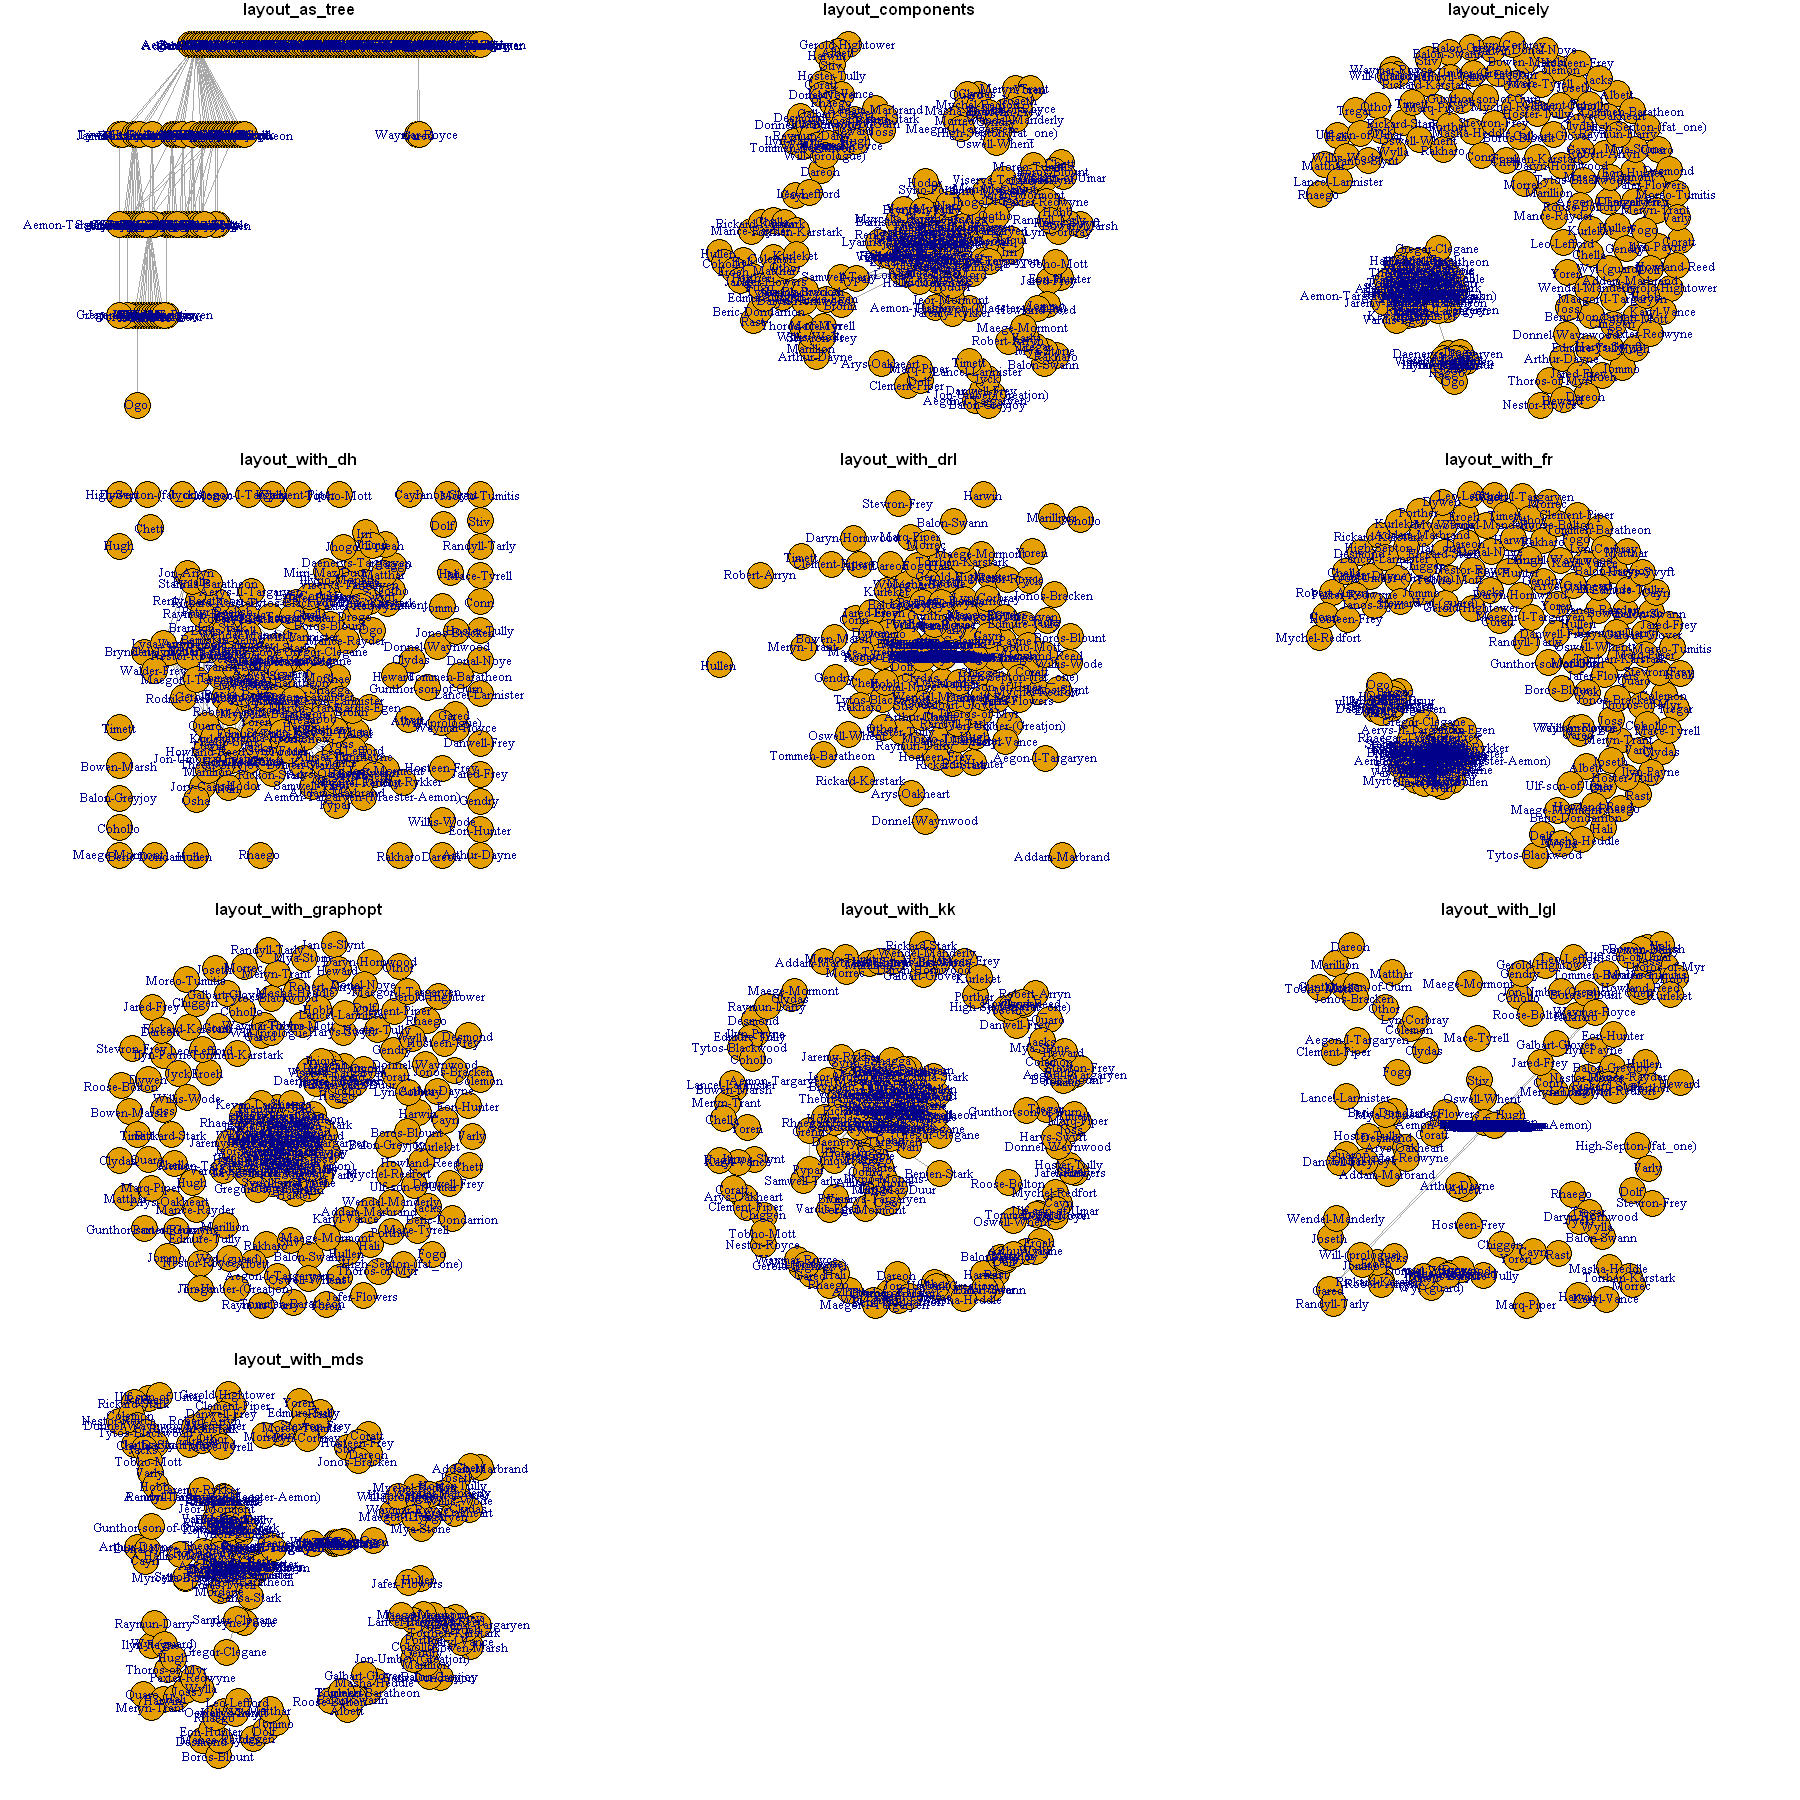

In [10]:
#1. 
# Remove the grid, star and circle layouts:
layouts <- layouts[!grepl("layout_on_grid|layout_as_star|layout_in_circle|layout_on_sphere|layout_with_gem|layout_randomly", layouts)]

# 2. only show conections where edges are greater than average weight
threshold.weight <- mean(E(GoT_Book1)$weight) # calculates the average edge weight value
# this code creates a new sparser graph where all edges with weights less than average have been deleted
sparser.GoT_Book1 <- delete_edges(GoT_Book1, E(GoT_Book1)[weight<threshold.weight])

# Now replot the reduced layout options with the sparser Book 1 network
par(mfrow=c(4,3), mar=c(1,1,1,1))

for (layout in layouts) {

  #print(layout)
  l <- do.call(layout, list(sparser.GoT_Book1)) 
  plot(sparser.GoT_Book1, edge.arrow.mode=0, layout=l, main=layout)
}

<p>The layout_nicely option could be interesting - let's plot that one by itself and reduce the vertex size so that we can see any edge connections:</p>

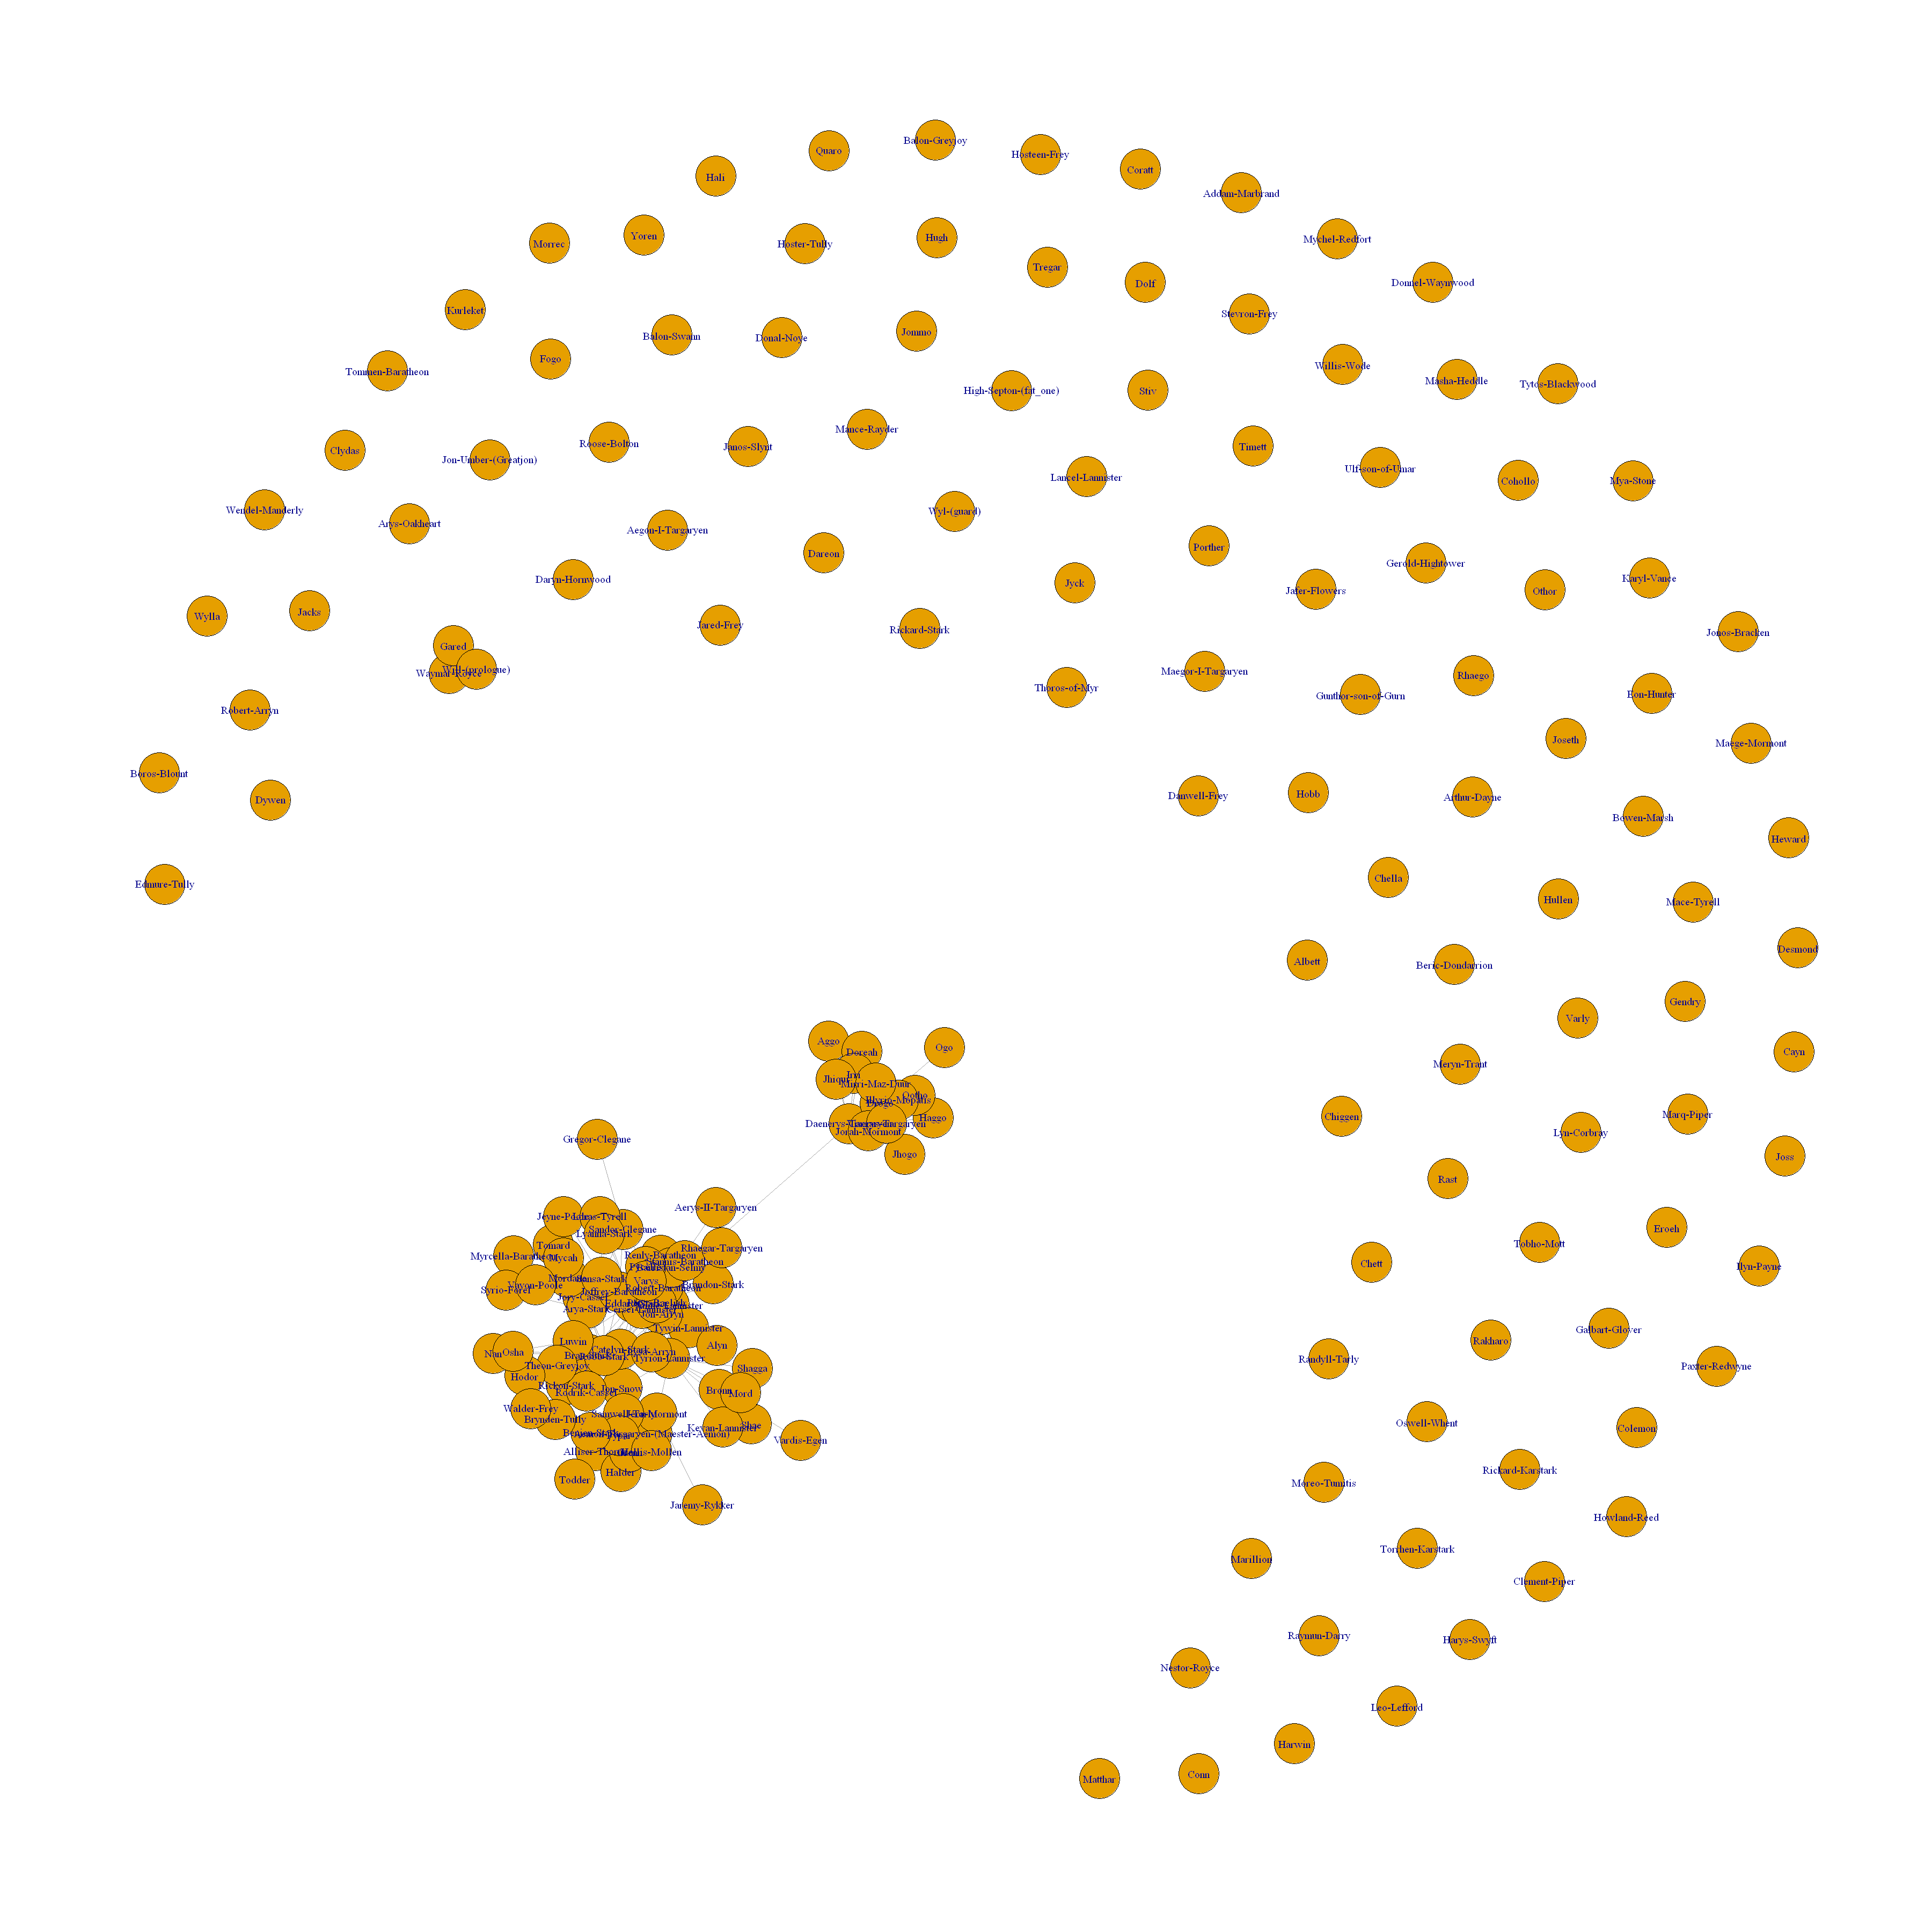

In [11]:
options(repr.plot.width=30, repr.plot.height=30) # this resizes the plot area (default = 7 by 7)
new_layout <- layout_nicely(sparser.GoT_Book1)
plot(sparser.GoT_Book1, layout = new_layout, vertex.size = 5)

<p>This layout allows us to see that there are quite a few disconnected nodes in this now much sparser graph data set.</p>
<p>We can remove the unconnected nodes, further filtering the data into a network of the most connected characters in Book 1:</p>

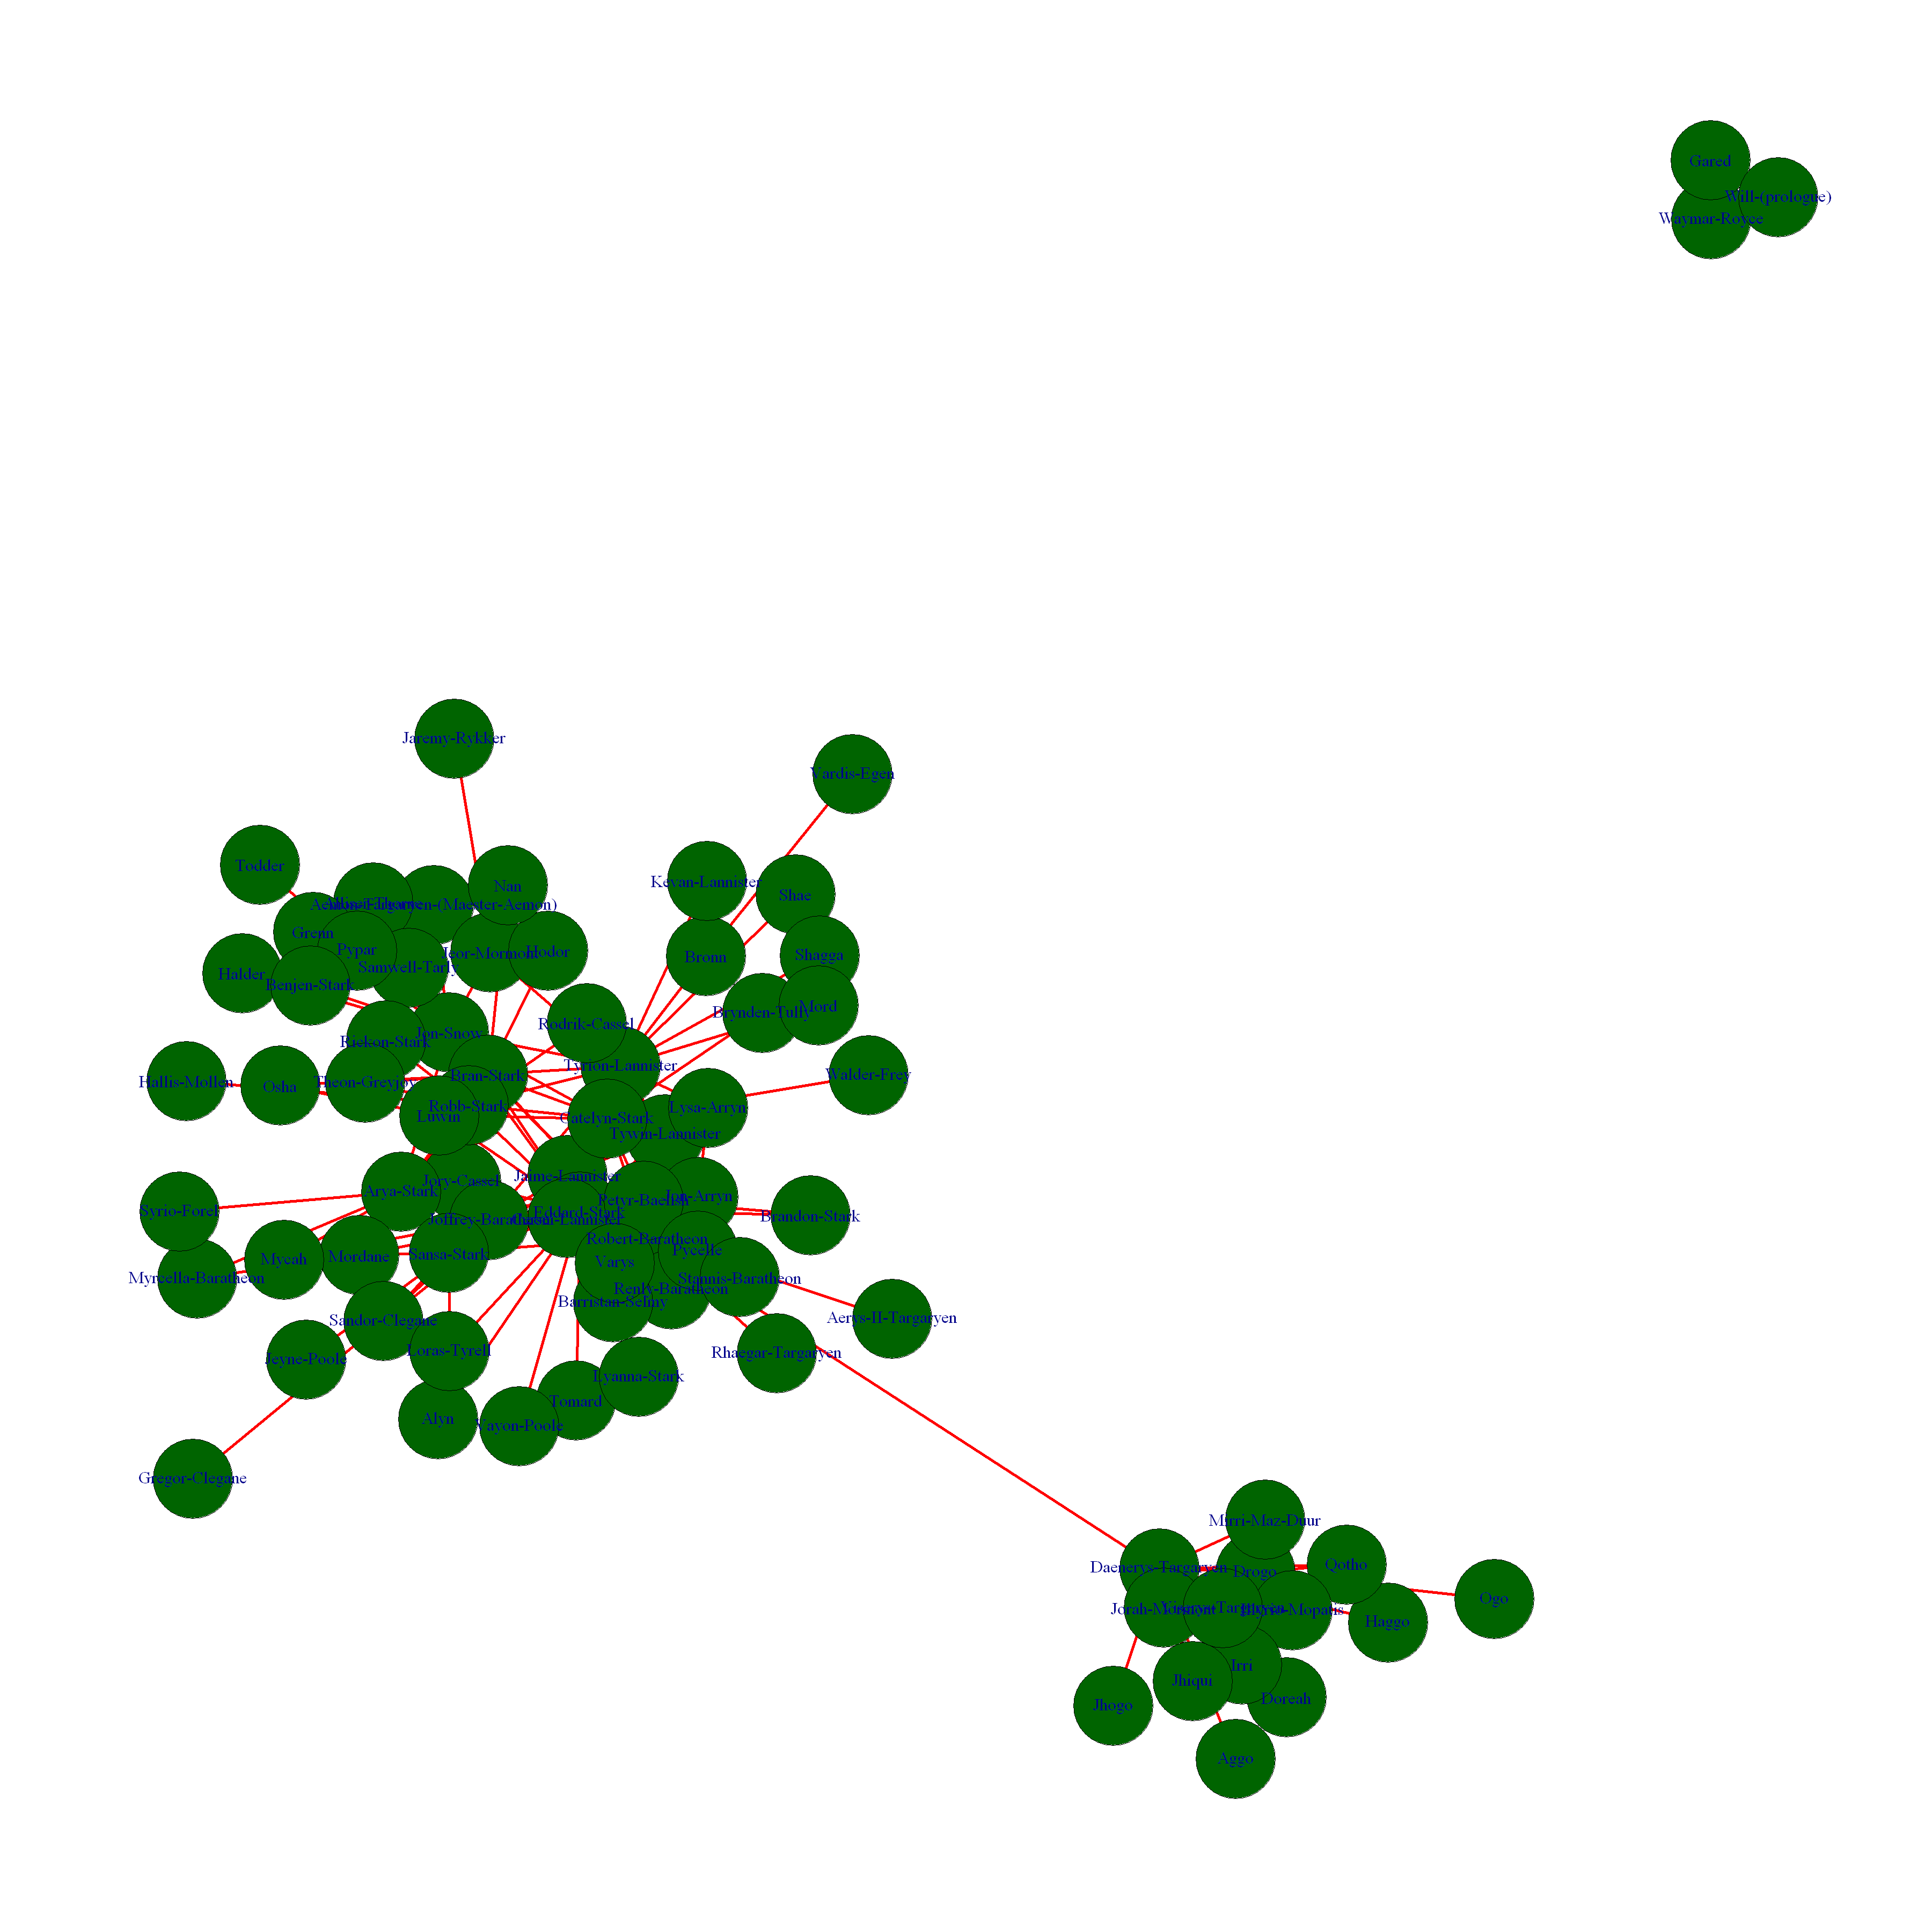

In [12]:
disconnected.nodes = which(degree(sparser.GoT_Book1)==0) # finds which nodes have degree = 0
reallySparse.GoT_Book1 <- delete.vertices(sparser.GoT_Book1, disconnected.nodes) # removes the degree = 0 nodes

new_layout <- layout_nicely(reallySparse.GoT_Book1)
plot(reallySparse.GoT_Book1, layout = new_layout, vertex.size = 10, vertex.label.cex = 1.6, edge.width=4, 
     edge.color = "red", vertex.color = "darkgreen")

<p>If we zoom into the plot, we now see that there are 3 main clusters in this filtered Book1 dataset.</p>
<p>Fans of the books or the TV show wil be able to see that these 3 clusters correspond to:</p>
<ul>
    <li>Westeros main characters;</li>
    <li>Essos main characters;</li>
    <li>3 characters from the opening prologue scene of Book1.</li>
</ul>

<h1 style = "font-size:400%">Plotting Parameters</h1>
<p>Shown below are the main parameters used to adjust the aesthetics of networks plots.</p>
<p>Adjust your network plots to suit your own datasets and own personal aesthetic preferences.</p><br>
<strong>FOR NODES:</strong>
<ol>
<li><b>vertex.color:</b>	 Node color</li>
<li><b>vertex.frame.color:</b>	 Node border color</li>
<li><b>vertex.shape:</b>	 One of “none”, “circle”, “square”, “csquare”, “rectangle”, “crectangle”, “vrectangle”, “pie”, “raster”, or “sphere”</li>
<li><b>vertex.size:</b> Size of the node (default is 15)</li>
<li><b>vertex.size2:</b>	 The second size of the node (e.g. for a rectangle)</li>
<li><b>vertex.label:</b>	 Character vector used to label the nodes</li>
<li><b>vertex.label.family:</b>	 Font family of the label (e.g.“Times”, “Helvetica”)</li>
<li><b>vertex.label.font:</b>	 Font: 1 plain, 2 bold, 3, italic, 4 bold italic, 5 symbol</li>
<li><b>vertex.label.cex:</b>	 Font size (multiplication factor, device-dependent)</li>
<li><b>vertex.label.dist:</b>	 Distance between the label and the vertex</li>
<li><b>vertex.label.degree:</b>	 The position of the label in relation to the vertex,
 where 0 right, “pi” is left, “pi/2” is below, and “-pi/2” is above</li>
 </ol><br>
 <strong>FOR EDGES:</strong>
<ol>
<li><b>edge.color:</b>	 Edge color</li>
<li><b>edge.width:</b>	 Edge width, defaults to 1</li>
<li><b>edge.arrow.size:</b>	 Arrow size, defaults to 1</li>
<li><b>edge.arrow.width:</b>	 Arrow width, defaults to 1</li>
<li><b>edge.lty:</b>	 Line type, could be 0 or “blank”, 1 or “solid”, 2 or “dashed”,
 3 or “dotted”, 4 or “dotdash”, 5 or “longdash”, 6 or “twodash”</li>
<li><b>edge.label:</b>	 Character vector used to label edges</li>
<li><b>edge.label.family:</b>	 Font family of the label (e.g.“Times”, “Helvetica”)</li>
<li><b>edge.label.font:</b>	 Font: 1 plain, 2 bold, 3, italic, 4 bold italic, 5 symbol</li>
<li><b>edge.label.cex:</b>	 Font size for edge labels</li>
<li><b>edge.curved:</b>	 Edge curvature, range 0-1 (FALSE sets it to 0, TRUE to 0.5)</li>
<li><b>arrow.mode:</b>	 Vector specifying whether edges should have arrows where possible values are: 0 no arrow, 1 back, 2 forward, 3 both</li>
</ol><br>
 <strong>OTHER:</strong>
<ol>
<li><b>margin:</b>	 Empty space margins around the plot, vector with length 4</li>
<li><b>frame:</b>	 if TRUE, the plot will be framed</li>
<li><b>main:</b>	 If set, adds a title to the plot</li>
<li><b>sub:</b>	 If set, adds a subtitle to the plot</li>
</ol><br>
<p>What we have seen here is not an exhaustive process for extracting visual information from a network; nor should it be done in isolation and without calculating some of the salient network statistics/metrics such as transitivity, average degree and network density to name but a few.</p>
<p>This next section calculates some of these metrics for our Game of Thrones data. Again, this is only an introduction to calculating network metrics, and we will go much further into this in the Networks Practicals work later on.</p>   

<h1 style = "font-size:400%">Some Further Network Metrics</h1>
<p> Let's now look at finding out some more information on the Game of Thrones data.</p><br>
<strong>Let's see if we can discover who are the most connected characters per book?</strong>

In [13]:
# This loop uses the degree function within the sort.int function to create a decreasing list of the nodes by their degree count.
# The use of '[1:5]' returns only the top 5 of the people and their degree counts and stores it in the persons object
for(i in 1:5){
  
  assign("booknumber", paste0("GoT_Book",i))
  persons <- sort.int(degree(get(booknumber)),decreasing = TRUE)[1:5]
  # print the results by book
  print(paste0("In Book ",i," it's:")) 
  print(persons) 
}

[1] "In Book 1 it's:"
    Eddard-Stark Robert-Baratheon Tyrion-Lannister    Catelyn-Stark 
              66               50               46               43 
        Jon-Snow 
              37 
[1] "In Book 2 it's:"
 Tyrion-Lannister Joffrey-Baratheon  Cersei-Lannister        Arya-Stark 
               53                47                43                40 
Stannis-Baratheon 
               37 
[1] "In Book 3 it's:"
 Tyrion-Lannister          Jon-Snow Joffrey-Baratheon        Robb-Stark 
               59                52                50                49 
      Sansa-Stark 
               48 
[1] "In Book 4 it's:"
 Jaime-Lannister Cersei-Lannister Brienne-of-Tarth Tyrion-Lannister 
              64               60               28               26 
 Margaery-Tyrell 
              25 
[1] "In Book 5 it's:"
          Jon-Snow Daenerys-Targaryen  Stannis-Baratheon   Tyrion-Lannister 
                62                 58                 47                 33 
     Theon-Greyjoy 


<p>We can check for any cliques in a network object - let's find the largest clique(s) for Book 1:</p>
<i>NOTE: Review your graph theory notes for a definition of what comprises a clique</i>

In [14]:
largest_cliques(GoT_Book1) # this prints out the names of the nodes which comprise the largest clique(s)
print(paste0("The size of the largest clique(s) is ",clique_num(GoT_Book1))) # this tells us the size of the largets clique(s)

[[1]]
+ 10/187 vertices, named, from c64e3ca:
 [1] Eddard-Stark      Robert-Baratheon  Sansa-Stark       Joffrey-Baratheon
 [5] Cersei-Lannister  Petyr-Baelish     Renly-Baratheon   Pycelle          
 [9] Barristan-Selmy   Varys            

[[2]]
+ 10/187 vertices, named, from c64e3ca:
 [1] Eddard-Stark      Robert-Baratheon  Sansa-Stark       Joffrey-Baratheon
 [5] Cersei-Lannister  Petyr-Baelish     Renly-Baratheon   Jaime-Lannister  
 [9] Barristan-Selmy   Varys            

[[3]]
+ 10/187 vertices, named, from c64e3ca:
 [1] Eddard-Stark      Robert-Baratheon  Sansa-Stark       Joffrey-Baratheon
 [5] Cersei-Lannister  Petyr-Baelish     Renly-Baratheon   Jaime-Lannister  
 [9] Barristan-Selmy   Sandor-Clegane   

[[4]]
+ 10/187 vertices, named, from c64e3ca:
 [1] Eddard-Stark      Robert-Baratheon  Sansa-Stark       Joffrey-Baratheon
 [5] Cersei-Lannister  Petyr-Baelish     Renly-Baratheon   Jaime-Lannister  
 [9] Tyrion-Lannister  Varys            

[[5]]
+ 10/187 vertices, named, 

[1] "The size of the largest clique(s) is 10"


<strong>What is the average clustering coefficient (or transitivity) of the Book1 network?</strong>

In [15]:
transitivity(GoT_Book1)

[1] 0.3302343

<strong>Who is Aemon-Targaryen directly connected to in Book , that is, who are the neighbours of Aemon-Targaryen?</strong>

In [16]:
neighbors(GoT_Book1, 'Aemon-Targaryen-(Maester-Aemon)') 

+ 7/187 vertices, named, from c64e3ca:
[1] Alliser-Thorne Bowen-Marsh    Chett          Clydas         Jeor-Mormont  
[6] Jon-Snow       Samwell-Tarly 

<p>And there are many more questions we could ask of this dataset ... which we don't have time to try out here*</p>

*a lot of metrics can take a long time to run for large networks

<p>In the Networks practicals, we will cover some more network metrics and how to calculate them in R, as well as what they can tell us about the data.</p>
<p><b>That's the end of the 3-Network Analysis R notebook</b></p>